In [110]:
import konlpy

In [111]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [112]:
dic = pd.read_csv('./data/cleaned.csv',encoding = 'UTF-8-sig')
dic[:5]

,https://www.twitch.tv/frog135,게구리 - Twitch,1
0,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5
1,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5
2,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1
3,https://blog.naver.com/jung55120/222038434043,"[자격증 취득] 데이터 비전공자인 내가, AD.. : 네이버블로그",3
4,https://www.twitch.tv/,(1) Twitch,1


In [113]:
dic.columns = ['url', 'title', 'label']
dic[:5]

,url,title,label
0,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5
1,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5
2,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1
3,https://blog.naver.com/jung55120/222038434043,"[자격증 취득] 데이터 비전공자인 내가, AD.. : 네이버블로그",3
4,https://www.twitch.tv/,(1) Twitch,1


In [114]:
dic['domain'] = dic['url'].str.split('/').str[2]
dic[:5]

,url,title,label,domain
0,https://docs.google.com/document/d/100AEt7rqVb...,시종설제안서 - Google Docs,5,docs.google.com
1,https://docs.google.com/document/u/1/d/100AEt7...,시종설제안서 - Google Docs,5,docs.google.com
2,https://www.twitch.tv/akaros83,AKaros83 - Twitch,1,www.twitch.tv
3,https://blog.naver.com/jung55120/222038434043,"[자격증 취득] 데이터 비전공자인 내가, AD.. : 네이버블로그",3,blog.naver.com
4,https://www.twitch.tv/,(1) Twitch,1,www.twitch.tv


# 데이터 정리
labeling

import glob

input_file = r'.\data' # csv파일들이 있는 디렉토리 위치
output_file = r'.\data\history_data.csv' # 병합하고 저장하려는 파일명

allFile_list = glob.glob(os.path.join(input_file, '*history*.csv')) # glob함수로 sales_로 시작하는 파일들을 모은다
print(allFile_list)
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다
for file in allFile_list:
    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다
    

dataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.
dataCombine.to_csv(output_file, index=False) # to_csv함수로 저장한다. 인데스를 빼려면 False로 설정

# dic = pd.read_csv(file, encoding = 'UTF-8-sig')
# dic.columns = ['url', 'title', 'timestamp']
# dic['label'] = -1

def labeling(file):#기사 내용 중 단어 선별하기
    pd.read csv
    etc = ['']    # 기타: 0
    ent = ['youtube', 'webtoon']    # 엔터테인먼트: 1
    prod = ['bank']   # 생산성 및 금융: 2
    sns = ['blog', 'news', 'facebook', 'instagram', 'twitter', 'tistory'] # 소셜: 3
    shop = ['shopping', 'store']    # 쇼핑 및 음식: 4
    doc = ['document', 'docs', 'pdf']  # 정보 및 문서: 5
    edu = ['exam', 'career']  #  자기계발: 6
    labels = [etc, ent, prod, sns, shop, doc, edu, car]

    for key in label for label in labels:
        pat = '*'+key+'*'
        if pat.search(str(x)):
            f['label'] = 1
        elif str(x).search(str(x)):
            f['label'] = 2
    for word in sns:
        if str(x).search(str(x)):
            f['label'] = 3
    for word in shop:
        if str(x).search(word):
            f['label'] = 4
    for word in doc:
        if f['url'].str.contains(word):
            f['label'] = 5
    for word in edu:
        if f['url'].str.contains(word):
            f['label'] = 6
    for word in car:
        if f['url'].str.contains(word):
            f['label'] = 7
    for word in etc:
        if f['url'].str.contains(word):
            f['label'] = 0
labeling('./data/history.csv')

In [115]:
data = dic[['url','title','label']]
data[:5]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     2744 non-null   object
 1   title   2636 non-null   object
 2   label   2744 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 64.4+ KB


In [116]:
print(len(data)) # 댓글 개수 출력
data = data.dropna(subset=['url'])
data = data.drop_duplicates(subset=['url'])
print(len(data)) # 댓글 개수 출력
data.info()

2744
2744
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2744 entries, 0 to 2743
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     2744 non-null   object
 1   title   2636 non-null   object
 2   label   2744 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 85.8+ KB


<AxesSubplot:>

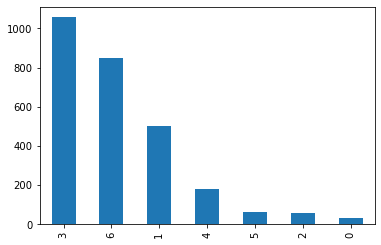

In [117]:
data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [118]:
url_data = data['url']
tit_data = data['title']
y_data = data['label']
print('url 개수: {}'.format(len(url_data)))
print('title 개수: {}'.format(len(tit_data)))
print('label 개수: {}'.format(len(y_data)))

url 개수: 2744
title 개수: 2744
label 개수: 2744


# 불용어 제거 및 토큰화

In [119]:
kr_norm = []
eng_norm = []
for string in tit_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('kr title')
    kr_norm.append(tokens)
for string in tit_data.tolist():
    try:
        tokens = re.sub("[^A-Za-z]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('eng title')
    eng_norm.append(tokens)
for string in url_data.tolist():
    try:
        tokens = re.sub("[^A-Za-z]+", " ", string.lower())
    except Exception as e:
        print(string)
        print(e)
        print('eng url')
    eng_norm.append(tokens)

nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr title
nan
'float' object has no attribute 'lower'
kr

In [120]:
for sentence in zip(kr_norm, eng_norm):
    print(sentence)

('시종설제안서 ', ' google docs')
('시종설제안서 ', ' google docs')
(' ', 'akaros twitch')
(' 자격증 취득 데이터 비전공자인 내가 네이버블로그', ' ad ')
(' ', ' twitch')
(' ', 'youtube')
('받은편지함 ', ' kimyb gmail com gmail')
('시종설 제안서 발표 ', ' ppt google slides')
('시종설 제안서 발표 ', ' ppt google slides')
(' 난 사실 조장이 아니라 분조장이다 ', ' youtube')
('검색 네이버 지도', ' ')
(' 자격의 모든것', 'q net ')
('장소선택 원서접수 신청 홈페이지', ' q net ')
('장소선택 원서접수 신청 홈페이지', ' q net ')
('추가입력 응시정보 원서접수 신청 ', ' q net')
('진행중인 접수내역 원서접수내역 ', ' q net')
('진행중인 접수내역 원서접수내역 ', ' q net')
('로그인 ', ' q net')
('로그인 ', ' q net')
('로그인 ', ' q net')
('원서접수현황 목록 ', ' q net')
('장소선택 원서접수 신청 홈페이지', ' q net ')
('장소선택 원서접수 신청 홈페이지', ' q net ')
('추가입력 응시정보 원서접수 신청 ', ' q net')
('진행중인 접수내역 원서접수내역 ', ' q net')
('진행중인 접수내역 원서접수내역 ', ' q net')
('종목선택 원서접수신청 ', ' q net')
(' 자격의 모든것', 'q net ')
('검색 네이버 지도', ' ')
('검색 네이버 지도', ' ')
('검색 네이버 지도', ' ')
('검색 네이버 지도', ' ')
('검색 네이버 지도', ' ')
('검색 네이버 지도', ' ')
('검색 네이버 지도', ' ')
('검색 네이버 지도', ' ')
('네이버 지도', ' ')
('네이버 지도', ' ')
('네이버 지도', ' 

In [121]:
kr_stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
eng_stopwords=['https','http','www','com','co','kr','org','ac']#불용어 제거하기

In [122]:
from konlpy.tag import Okt  
okt = Okt()

In [123]:
X_token=[]
for sentence in kr_norm:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in kr_stopwords] # 불용어 제거
    X_token.append(temp_X)

In [124]:
print(X_token[:3])
print(len(X_token))

[['시종', '설', '제안', '서'], ['시종', '설', '제안', '서'], []]
2744


In [125]:
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [126]:
ps=PorterStemmer()

stop_words = set(stopwords.words('english'))

stemData=[]
for sentence in eng_norm:
    tokenData = nltk.word_tokenize(sentence)
    tempData = []
    for word in tokenData:  # 불용어 제거
        if word not in stop_words and word not in eng_stopwords:
            word = ps.stem(word)
            if len(word)>1:
                tempData.append(word)
    stemData.append(tempData)

In [127]:
print(X_token[:5])
print(len(X_token))
print(len(stemData))
temp = []
for n,m in zip(X_token,stemData):
    temp.append(n+m)
X_token = temp

[['시종', '설', '제안', '서'], ['시종', '설', '제안', '서'], [], ['자격증', '취득', '데이터', '비', '전공자', '인', '내', '네이버', '블로그'], []]
2744
5488


In [128]:
print(X_token[:5])
print(len(X_token))

[['시종', '설', '제안', '서', 'googl', 'doc'], ['시종', '설', '제안', '서', 'googl', 'doc'], ['akaro', 'twitch'], ['자격증', '취득', '데이터', '비', '전공자', '인', '내', '네이버', '블로그', 'ad'], ['twitch']]
2744


# 정수 인코딩 수행

In [129]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [130]:
print(X_token[:3])
print(len(X_token))

[[82, 83, 91, 55, 35, 502], [82, 83, 91, 55, 35, 502], [1571, 357]]
2744


In [131]:
word_to_index = tokenizer.word_index

In [132]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 3024


# 전체 데이터 길이 분포 확인

train data의 최대 길이 : 32
train data의 최소 길이 : 1
data의 평균 길이 : 6.474854227405248


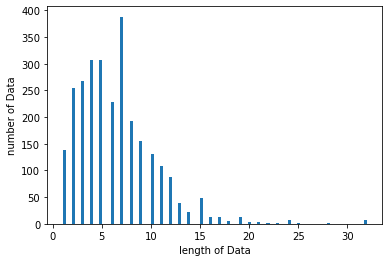

In [133]:
print('train data의 최대 길이 :',max(len(l) for l in X_token))
print('train data의 최소 길이 :',min(len(l) for l in X_token))
print('data의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [134]:
max_len = max(len(l) for l in X_token)
X_data = pad_sequences(X_token, maxlen=max_len)
print("X data shape: ", X_data.shape)
print("y data shape: ", y_data.shape)

X data shape:  (2744, 32)
y data shape:  (2744,)


In [135]:
y_data = np.array(y_data).reshape(-1, 1)

In [136]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   82   83
    91   55   35  502]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   82   83
    91   55   35  502]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 1571  357]]
[[5]
 [5]
 [1]]


# 데이터 분리

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

In [138]:
print(X_train[:3])
print(y_train[:3]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  84 208 436 184 184]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 162 361 362 221 240  62 904 120   2  40]
 [  0   0   0   0   0   0   0   0   0   0  77 641 133 725 275  45  98   4
  260  42 195 299 614  42 195 200   4 329 756 757 406  14]]
[[3]
 [3]
 [1]]


# 모델 만들기(loss: 0.0691 - acc: 0.9811 테스트 정확도: 0.9381)

In [139]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [144]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(7, activation='sigmoid'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 1536 samples, validate on 384 samples
Epoch 1/10
1536/1536 [==============================] - 15s 10ms/sample - loss: 1.5308 - acc: 0.4036 - val_loss: 1.4113 - val_acc: 0.3828
Epoch 2/10
1536/1536 [==============================] - 7s 4ms/sample - loss: 1.1840 - acc: 0.5345 - val_loss: 0.8193 - val_acc: 0.7969
Epoch 3/10
1536/1536 [==============================] - 7s 4ms/sample - loss: 0.5188 - acc: 0.8600 - val_loss: 0.4221 - val_acc: 0.8828
Epoch 4/10
1536/1536 [==============================] - 7s 4ms/sample - loss: 0.2581 - acc: 0.9329 - val_loss: 0.3364 - val_acc: 0.9089
Epoch 5/10
1536/1536 [==============================] - 6s 4ms/sample - loss: 0.1639 - acc: 0.9688 - val_loss: 0.2974 - val_acc: 0.9349
Epoch 6/10
1536/1536 [==============================] - 6s 4ms/sample - loss: 0.1161 - acc: 0.9688 - val_loss: 0.2823 - val_acc: 0.9401
Epoch 7/10
1536/1536 [==============================] - 6s 4ms/sample - loss: 0.0933 - acc: 0.9785 - val_loss: 0.2581 - val_acc: 0.9401

In [145]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

824/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

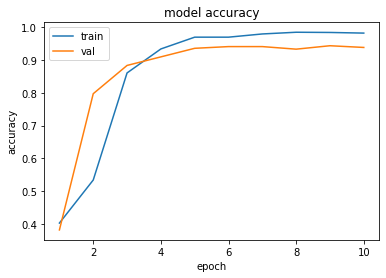

In [146]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

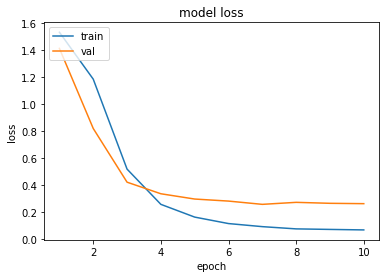

In [147]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()